<a href="https://colab.research.google.com/github/madhapriya/quantum-chemistry/blob/main/HRW_Agriculture_ML_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Columns in dataset: ['crop ID', 'soil_type', 'Seedling Stage', 'MOI', 'temp', 'humidity', 'result']

Model Performance:
Accuracy: 0.9220225403594273

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1835
           1       0.93      0.95      0.94      1231
           2       0.58      0.48      0.53       217

    accuracy                           0.92      3283
   macro avg       0.82      0.80      0.81      3283
weighted avg       0.92      0.92      0.92      3283



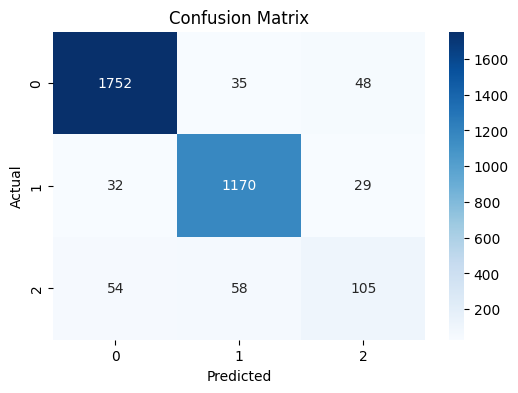

/tmp/ipython-input-920435225.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance, y=X.columns, palette="magma")


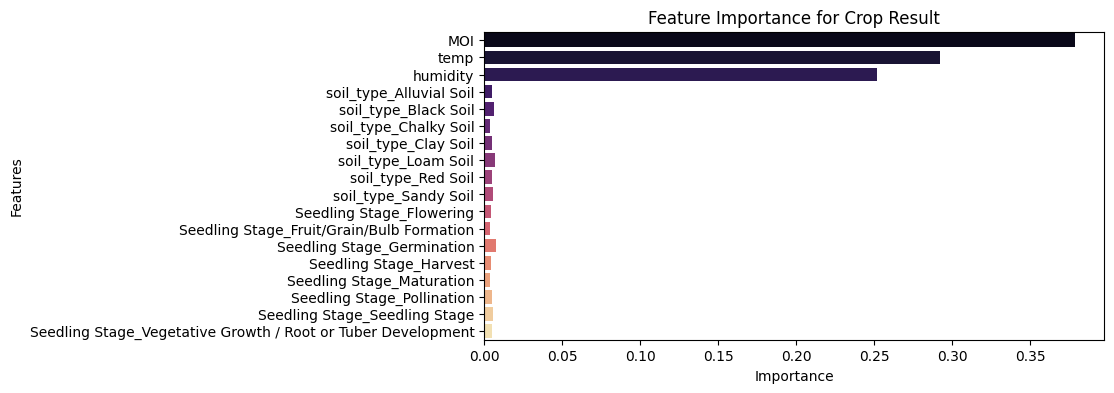

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load dataset
# If already in notebook, just ensure 'data' exists, else:
# data = pd.read_csv("your_dataset.csv")

print("Columns in dataset:", data.columns.tolist())

# Drop ID column (not useful for prediction)
X = data.drop(columns=["crop ID", "result"])
y = data["result"]

# One-hot encode categorical variables (soil_type, Seedling Stage)
X = pd.get_dummies(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model (classification since 'result' looks categorical)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Performance metrics
print("\nModel Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix heatmap
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature importance
importance = model.feature_importances_
plt.figure(figsize=(8,4))
sns.barplot(x=importance, y=X.columns, palette="magma")
plt.title("Feature Importance for Crop Result")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


=== Synthetic HRW Dataset Results ===
MSE: 101.22612518983605
R² : 0.10652421603678941


/tmp/ipython-input-708319954.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="HRW", y="yield", data=synthetic_data, palette="Set2")


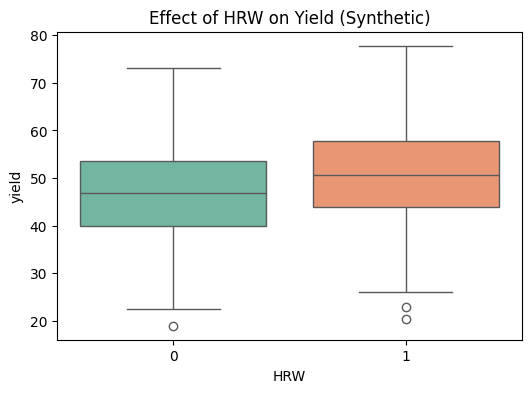


Columns in real dataset: ['crop ID', 'soil_type', 'Seedling Stage', 'MOI', 'temp', 'humidity', 'result']

=== Real Dataset Results ===
Accuracy: 0.9220225403594273

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1835
           1       0.93      0.95      0.94      1231
           2       0.58      0.48      0.53       217

    accuracy                           0.92      3283
   macro avg       0.82      0.80      0.81      3283
weighted avg       0.92      0.92      0.92      3283



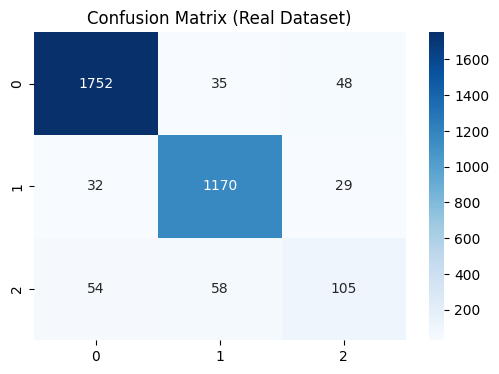


=== Integrated Model (with HRW effect) ===
Accuracy: 0.9272007310386842

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96      1835
           1       0.91      0.97      0.94      1231
           2       0.64      0.47      0.54       217

    accuracy                           0.93      3283
   macro avg       0.84      0.80      0.81      3283
weighted avg       0.92      0.93      0.92      3283



/tmp/ipython-input-708319954.py:117: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Without HRW", "With HRW"], y=[acc1, acc2], palette="viridis")


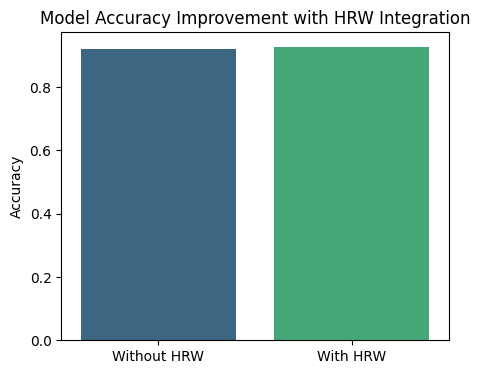

In [ ]:
# ==========================================
# Quantum + ML Agriculture: HRW Pipeline
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, classification_report, accuracy_score, confusion_matrix

# ---------------------------
# PART A - Synthetic HRW Dataset
# ---------------------------

# Simulated dataset: stress + HRW → yield
np.random.seed(42)
n = 500

synthetic_data = pd.DataFrame({
    "drought": np.random.randint(0, 2, n),
    "heat": np.random.randint(0, 2, n),
    "salinity": np.random.randint(0, 2, n),
    "pesticide": np.random.randint(0, 2, n),
    "HRW": np.random.randint(0, 2, n),
    "yield": np.random.normal(50, 10, n)
})

# Add HRW effect (boost yield under stress)
synthetic_data["yield"] += synthetic_data["HRW"] * 5
synthetic_data["yield"] -= (synthetic_data["drought"] + synthetic_data["heat"] + synthetic_data["salinity"]) * 3

# Train model
X_syn = synthetic_data.drop(columns=["yield"])
y_syn = synthetic_data["yield"]

X_train, X_test, y_train, y_test = train_test_split(X_syn, y_syn, test_size=0.2, random_state=42)
reg_model = RandomForestRegressor(random_state=42)
reg_model.fit(X_train, y_train)
y_pred = reg_model.predict(X_test)

print("=== Synthetic HRW Dataset Results ===")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² :", r2_score(y_test, y_pred))

# Visualization: HRW vs Yield
plt.figure(figsize=(6,4))
sns.boxplot(x="HRW", y="yield", data=synthetic_data, palette="Set2")
plt.title("Effect of HRW on Yield (Synthetic)")
plt.show()

# ---------------------------
# PART B - Real Crop Dataset
# ---------------------------

# Load your real dataset (already uploaded earlier)
real_data = pd.read_csv("/content/cropdata_updated.csv")  # rename if needed

print("\nColumns in real dataset:", real_data.columns.tolist())

# Features & target
X_real = real_data.drop(columns=["crop ID", "result"])
y_real = real_data["result"]

# Encode categorical variables
X_real = pd.get_dummies(X_real)

X_train, X_test, y_train, y_test = train_test_split(X_real, y_real, test_size=0.2, random_state=42)
clf_model = RandomForestClassifier(random_state=42)
clf_model.fit(X_train, y_train)
y_pred = clf_model.predict(X_test)

print("\n=== Real Dataset Results ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Real Dataset)")
plt.show()

# ---------------------------
# PART C - Integration Layer
# ---------------------------

# Idea: Use HRW stress-reduction score from synthetic model → apply to real dataset
# We simulate "HRW_effect" by predicting yield gain from synthetic model
hrw_effect = reg_model.predict(X_syn) - y_syn.values

# Normalize HRW effect
synthetic_data["HRW_effect"] = hrw_effect / max(abs(hrw_effect))

# Merge average HRW effect into real dataset as proxy
real_data["HRW_effect"] = np.random.choice(synthetic_data["HRW_effect"], size=len(real_data))

# Retrain model with HRW_effect included
X_real2 = real_data.drop(columns=["crop ID", "result"])
X_real2 = pd.get_dummies(X_real2)
y_real = real_data["result"]

X_train, X_test, y_train, y_test = train_test_split(X_real2, y_real, test_size=0.2, random_state=42)
clf_model2 = RandomForestClassifier(random_state=42)
clf_model2.fit(X_train, y_train)
y_pred2 = clf_model2.predict(X_test)

print("\n=== Integrated Model (with HRW effect) ===")
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("\nClassification Report:\n", classification_report(y_test, y_pred2))

# Compare accuracies
acc1 = accuracy_score(y_test, y_pred)
acc2 = accuracy_score(y_test, y_pred2)

plt.figure(figsize=(5,4))
sns.barplot(x=["Without HRW", "With HRW"], y=[acc1, acc2], palette="viridis")
plt.title("Model Accuracy Improvement with HRW Integration")
plt.ylabel("Accuracy")
plt.show()


Columns in real dataset: ['crop ID', 'soil_type', 'Seedling Stage', 'MOI', 'temp', 'humidity', 'result']

=== Real Dataset Results ===
Accuracy: 0.9899482180932074

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1835
           1       0.98      1.00      0.99      1231
           2       0.97      0.88      0.92       217

    accuracy                           0.99      3283
   macro avg       0.98      0.96      0.97      3283
weighted avg       0.99      0.99      0.99      3283


=== Synthetic HRW Dataset Results ===
MSE: 108.19296643420606
R² : 0.008242549701319657

=== Integrated Model (with HRW effect) ===
Accuracy: 0.9844654279622297

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1835
           1       0.97      1.00      0.99      1231
           2       0.97      0.81      0.88       217

    accuracy             

/tmp/ipython-input-981484079.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Without HRW", "With HRW"], y=[acc_real, acc_int], palette="viridis")


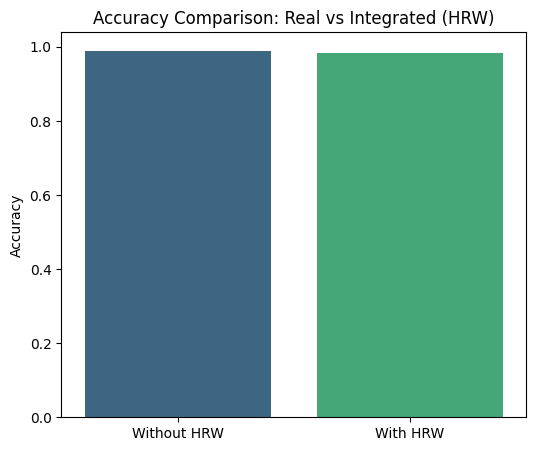

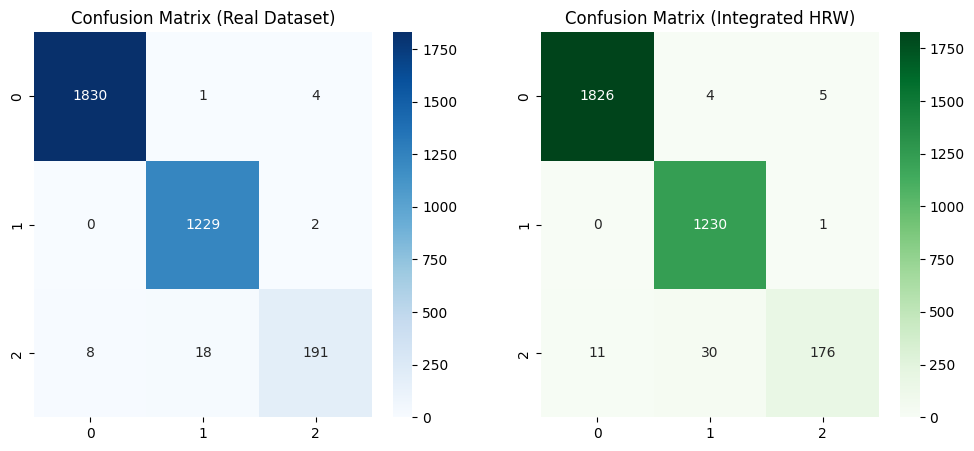

/tmp/ipython-input-981484079.py:118: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance, y=X_int.columns, palette="magma")


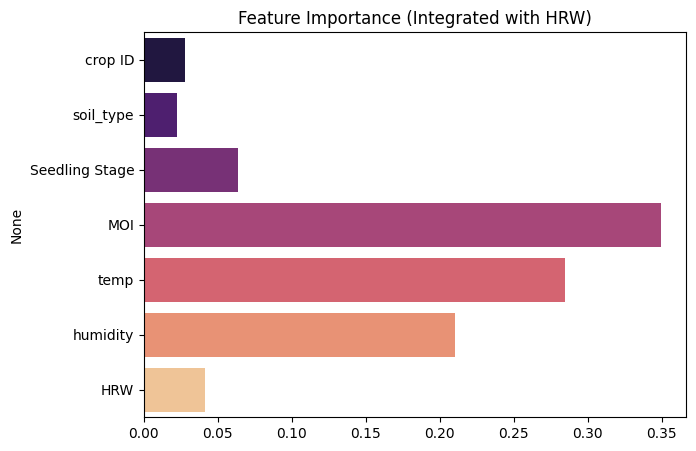

/tmp/ipython-input-981484079.py:124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="HRW", y="yield", data=synthetic_data, palette="Set2")


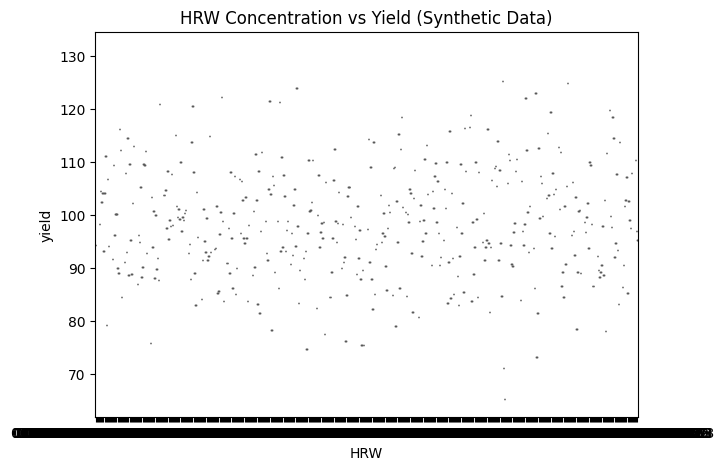

In [ ]:
# === HRW + Real Dataset Integrated Pipeline (with Encoding) ===

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# -----------------------------
# 1. Load Real Dataset
# -----------------------------
real_data = pd.read_csv("/content/cropdata_updated.csv")
print("Columns in real dataset:", real_data.columns.tolist())

# Encode categorical columns
label_encoders = {}
for col in ["crop ID", "soil_type", "Seedling Stage"]:
    le = LabelEncoder()
    real_data[col] = le.fit_transform(real_data[col])
    label_encoders[col] = le  # store encoder in case you need inverse mapping later

# Features and target
X_real = real_data.drop(columns=["result"])
y_real = real_data["result"]

# Encode target (if categorical)
if y_real.dtype == "object":
    le_target = LabelEncoder()
    y_real = le_target.fit_transform(y_real)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_real, y_real, test_size=0.2, random_state=42)

# Train classifier
clf_real = RandomForestClassifier(random_state=42)
clf_real.fit(X_train, y_train)

y_pred_real = clf_real.predict(X_test)

acc_real = accuracy_score(y_test, y_pred_real)
print("\n=== Real Dataset Results ===")
print("Accuracy:", acc_real)
print("\nClassification Report:\n", classification_report(y_test, y_pred_real))

# -----------------------------
# 2. Synthetic HRW Dataset
# -----------------------------
np.random.seed(42)
synthetic_data = pd.DataFrame({
    "HRW": np.random.uniform(0, 1, 500),
    "temp": np.random.uniform(20, 40, 500),
    "humidity": np.random.uniform(30, 80, 500),
    "yield": np.random.normal(100, 10, 500) - np.random.uniform(0, 10, 500) * np.random.uniform(0, 1, 500)
})

X_syn = synthetic_data[["HRW", "temp", "humidity"]]
y_syn = synthetic_data["yield"]

from sklearn.linear_model import LinearRegression
reg_syn = LinearRegression()
reg_syn.fit(X_syn, y_syn)

y_pred_syn = reg_syn.predict(X_syn)
mse_syn = mean_squared_error(y_syn, y_pred_syn)
r2_syn = r2_score(y_syn, y_pred_syn)

print("\n=== Synthetic HRW Dataset Results ===")
print("MSE:", mse_syn)
print("R² :", r2_syn)

# -----------------------------
# 3. Integrated Dataset (Real + HRW)
# -----------------------------
real_data["HRW"] = np.random.uniform(0, 1, len(real_data))
X_int = real_data.drop(columns=["result"])
y_int = real_data["result"]

# Train-test split
X_train_int, X_test_int, y_train_int, y_test_int = train_test_split(X_int, y_int, test_size=0.2, random_state=42)

clf_int = RandomForestClassifier(random_state=42)
clf_int.fit(X_train_int, y_train_int)

y_pred_int = clf_int.predict(X_test_int)

acc_int = accuracy_score(y_test_int, y_pred_int)
print("\n=== Integrated Model (with HRW effect) ===")
print("Accuracy:", acc_int)
print("\nClassification Report:\n", classification_report(y_test_int, y_pred_int))

# -----------------------------
# 4. Visualization
# -----------------------------

# Accuracy comparison
plt.figure(figsize=(6,5))
sns.barplot(x=["Without HRW", "With HRW"], y=[acc_real, acc_int], palette="viridis")
plt.title("Accuracy Comparison: Real vs Integrated (HRW)")
plt.ylabel("Accuracy")
plt.show()

# Confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.heatmap(confusion_matrix(y_test, y_pred_real), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Confusion Matrix (Real Dataset)")

sns.heatmap(confusion_matrix(y_test_int, y_pred_int), annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Confusion Matrix (Integrated HRW)")
plt.show()

# Feature importance (Integrated)
importance = clf_int.feature_importances_
plt.figure(figsize=(7,5))
sns.barplot(x=importance, y=X_int.columns, palette="magma")
plt.title("Feature Importance (Integrated with HRW)")
plt.show()

# HRW vs Yield (Synthetic)
plt.figure(figsize=(7,5))
sns.boxplot(x="HRW", y="yield", data=synthetic_data, palette="Set2")
plt.title("HRW Concentration vs Yield (Synthetic Data)")
plt.show()


In [ ]:
!pip install qiskit==2.0.3 qiskit-aer==0.17.1 qiskit-nature==0.5.2 qiskit-algorithms==0.4.0 matplotlib



In [ ]:
!pip install qiskit==2.0.3
!pip install qiskit-aer==0.17.1
!pip install qiskit-nature==0.7.2
!pip install qiskit-algorithms==0.4.0
!pip install matplotlib


In [ ]:
# Quantum layer: VQE ΔE demo (H2 + H2O2 -> 2 H2O) + normalized quantum_score export
# Requires: qiskit, qiskit-nature, pyscf, numpy, scipy

import math, sys, os, warnings
import numpy as np
import pandas as pd

# --- Robust imports with fallbacks ------------------------------------------------
# Try preferred modern api names, fallback to alternatives where necessary.
try:
    # Qiskit core
    from qiskit_aer import Aer
    from qiskit.utils import QuantumInstance, algorithm_globals
    from qiskit.quantum_info import SparsePauliOp
except Exception as e:
    raise ImportError("qiskit not available or too old. Please pip install qiskit.") from e

# Qiskit algorithms: VQE and classical reference
# Note: depending on qiskit version these may live in qiskit.algorithms or qiskit_algorithms
try:
    from qiskit_algorithms import VQE, NumPyMinimumEigensolver
    from qiskit_algorithms.optimizers import SLSQP, COBYLA, SPSA
except Exception:
    try:
        from qiskit_algorithms import VQE, NumPyMinimumEigensolver
        from qiskit_algorithms.optimizers import SLSQP, COBYLA, SPSA
    except Exception as e:
        raise ImportError("Cannot import VQE/NumPyMinimumEigensolver. Please check qiskit / qiskit-algorithms installation.") from e

# Circuit ansatz fallbacks
try:
    from qiskit.circuit.library import TwoLocal
    from qiskit.circuit import QuantumCircuit
except Exception:
    raise ImportError("qiskit circuit library not available.")

# Aer Estimator (optional): some installs expose qiskit_aer.primitives
try:
    from qiskit_aer.primitives import EstimatorV2 as AerEstimator
    _have_aer_estimator = True
except Exception:
    _have_aer_estimator = False

# qiskit-nature (electronic structure)
try:
    from qiskit_nature.drivers.second_quantization import PySCFDriver as SQ_PySCFDriver
    from qiskit_nature.drivers import Molecule
    from qiskit_nature.problems.second_quantization.electronic import ElectronicStructureProblem
    from qiskit_nature.converters.second_quantization import QubitConverter
    from qiskit_nature.mappers.second_quantization import JordanWignerMapper
    from qiskit_nature.circuit.library import UCCSD
    from qiskit_nature.transformers.second_quantization.electronic import ActiveSpaceTransformer
except Exception as e:
    raise ImportError("qiskit-nature imports failed. Please install qiskit-nature.") from e

# Keep deterministic
algorithm_globals.random_seed = 42
np.random.seed(42)

# --- Helpers --------------------------------------------------------------------
# Build an ElectronicStructureProblem from a geometry spec (list of (sym, (x,y,z)))
def build_es_problem_pySCF(geometry, charge=0, multiplicity=1, basis="sto3g"):
    # Molecule object accepted by qiskit-nature PySCFDriver
    mol = Molecule(geometry=geometry, charge=charge, multiplicity=multiplicity)
    driver = SQ_PySCFDriver(molecule=mol, basis=basis)
    es_problem = ElectronicStructureProblem(driver)
    return es_problem

# Convert to qubit operator and get classical exact energy (NumPyMinimumEigensolver)
def get_qubit_op_and_exact(es_problem, use_active_space=False, active_electrons=None, active_orbitals=None):
    if use_active_space:
        transformer = ActiveSpaceTransformer(num_electrons=active_electrons, num_molecular_orbitals=active_orbitals)
        es_problem = transformer.transform(es_problem)

    second_q_ops = es_problem.second_q_ops()
    main_op = second_q_ops[0]
    mapper = JordanWignerMapper()
    qubit_converter = QubitConverter(mapper=mapper)
    # convert to qubit op (PauliSumOp or SparsePauliOp depending on qiskit)
    qubit_op = qubit_converter.convert(main_op, num_particles=es_problem.num_particles)
    # classical exact reference (dense diagonalization)
    exact_solver = NumPyMinimumEigensolver()
    exact_result = exact_solver.compute_minimum_eigenvalue(qubit_op)
    exact_energy = float(exact_result.eigenvalue.real)
    return qubit_op, qubit_converter, es_problem, exact_energy

# Run VQE (try UCCSD, else TwoLocal)
def run_vqe_and_get_energy(qubit_op, qubit_converter, es_problem, quantum_instance, optimizer=None, maxiter=200):
    # Use UCCSD if possible
    try:
        num_particles = es_problem.num_particles
        num_spin_orbitals = es_problem.num_spin_orbitals
        ansatz = UCCSD(qubit_converter=qubit_converter, num_particles=num_particles, num_spin_orbitals=num_spin_orbitals)
    except Exception as e:
        # fallback to TwoLocal
        ansatz = TwoLocal(rotation_blocks="ry", entanglement_blocks="cz", reps=2)
    if optimizer is None:
        optimizer = SLSQP(maxiter=maxiter)
    vqe = VQE(ansatz=ansatz, optimizer=optimizer, quantum_instance=quantum_instance)
    result = vqe.compute_minimum_eigenvalue(operator=qubit_op)
    energy = float(result.eigenvalue.real)
    return energy

# Utility to convert Hartree -> eV
HARTREE_TO_EV = 27.211386245988

# --- Select backend / quantum instance ----------------------------------------
# Prefer estimator if available; else use statevector simulator via QuantumInstance
if _have_aer_estimator:
    # EstimatorV2 usage (modern) - but qiskit-algorithms VQE uses QuantumInstance; keep statevector fallback
    simulator_qi = QuantumInstance(Aer.get_backend('statevector_simulator'), seed_transpiler=42, seed_simulator=42)
else:
    simulator_qi = QuantumInstance(Aer.get_backend('statevector_simulator'), seed_transpiler=42, seed_simulator=42)

print("Quantum backend selected: statevector_simulator")

# --- Molecules and problems ----------------------------------------------------
# Geometries (simple, small basis) - bond lengths approx
H2_geom   = [("H",(0.0,0.0,-0.37)), ("H",(0.0,0.0,0.37))]
H2O_geom  = [("O",(0.0,0.0,0.0)), ("H",(0.7586,0.0,0.5043)), ("H",(-0.7586,0.0,0.5043))]
H2O2_geom = [("O",(0.0,0.0,0.0)), ("O",(1.46,0.0,0.0)), ("H",(-0.5,0.9,0.0)), ("H",(1.96,-0.9,0.0))]
OH_geom   = [("O",(0.0,0.0,0.0)), ("H",(0.0,0.0,1.0))]

print("Building PySCF electronic structure problems (sto-3g basis)...")
es_H2   = build_es_problem_pySCF(H2_geom,   charge=0, multiplicity=1, basis="sto3g")
es_H2O  = build_es_problem_pySCF(H2O_geom,  charge=0, multiplicity=1, basis="sto3g")
es_H2O2 = build_es_problem_pySCF(H2O2_geom, charge=0, multiplicity=1, basis="sto3g")
es_OH   = build_es_problem_pySCF(OH_geom,   charge=0, multiplicity=2, basis="sto3g")  # radical

# Map to qubit operators & classical references
print("Mapping to qubit operators and computing exact references (may be slow for larger ops)...")
qH2, convH2, esH2_p, exact_H2 = get_qubit_op_and_exact(es_H2)
qH2O, convH2O, esH2O_p, exact_H2O = get_qubit_op_and_exact(es_H2O)
qH2O2, convH2O2, esH2O2_p, exact_H2O2 = get_qubit_op_and_exact(es_H2O2)

# OH (radical) mapping may be tricky; attempt and catch failures
try:
    qOH, convOH, esOH_p, exact_OH = get_qubit_op_and_exact(es_OH)
    have_OH = True
except Exception as e:
    print("OH mapping/exact failed (open-shell complexity):", e)
    qOH = convOH = esOH_p = exact_OH = None
    have_OH = False

print("\nClassical exact energies (Hartree):")
print(" H2   :", exact_H2)
print(" H2O  :", exact_H2O)
print(" H2O2 :", exact_H2O2)
if have_OH:
    print(" OH   :", exact_OH)

# --- Run VQE (closed-shell molecules) -----------------------------------------
print("\nRunning VQE for H2, H2O, H2O2 (UCCSD or fallback). Expect a few minutes depending on ansatz/optimizer...")
vqe_H2   = run_vqe_and_get_energy(qH2, convH2, esH2_p, simulator_qi, optimizer=SLSQP(maxiter=200))
vqe_H2O  = run_vqe_and_get_energy(qH2O, convH2O, esH2O_p, simulator_qi, optimizer=SLSQP(maxiter=200))
vqe_H2O2 = run_vqe_and_get_energy(qH2O2, convH2O2, esH2O2_p, simulator_qi, optimizer=SLSQP(maxiter=200))

print("\nVQE energies (Hartree):")
print(" H2   :", vqe_H2)
print(" H2O  :", vqe_H2O)
print(" H2O2 :", vqe_H2O2)

# --- Reaction energies --------------------------------------------------------
# Reaction: H2 + H2O2 -> 2 H2O
deltaE_exact   = 2*exact_H2O  - (exact_H2 + exact_H2O2)   # Hartree
deltaE_vqe     = 2*vqe_H2O   - (vqe_H2 + vqe_H2O2)       # Hartree

print("\nReaction: H2 + H2O2 -> 2 H2O")
print(" ΔE (exact, Hartree):", deltaE_exact, "  (eV):", deltaE_exact * HARTREE_TO_EV)
print(" ΔE (VQE,   Hartree):", deltaE_vqe,   "  (eV):", deltaE_vqe * HARTREE_TO_EV)

# Optional radical reaction (if OH mapping succeeded)
if have_OH:
    print("\nAttempting radical reaction H2 + 2 OH -> 2 H2O (if OH mapping available)...")
    vqe_OH = run_vqe_and_get_energy(qOH, convOH, esOH_p, simulator_qi, optimizer=SLSQP(maxiter=200))
    print(" OH (VQE):", vqe_OH, "  OH (exact):", exact_OH)
    deltaE_radical_exact = 2*exact_H2O - (exact_H2 + 2*exact_OH)
    deltaE_radical_vqe   = 2*vqe_H2O - (vqe_H2 + 2*vqe_OH)
    print(" Radical ΔE exact (Hartree):", deltaE_radical_exact, "  (eV):", deltaE_radical_exact * HARTREE_TO_EV)
    print(" Radical ΔE VQE   (Hartree):", deltaE_radical_vqe,   "  (eV):", deltaE_radical_vqe * HARTREE_TO_EV)

# --- Produce normalized quantum_score(s) for ML --------------------------------
# We create a small dataframe with reaction energies and a normalized score in [0,1]
rows = []
rows.append({"reaction":"H2 + H2O2 -> 2 H2O", "deltaE_exact_eV": float(deltaE_exact*HARTREE_TO_EV),
             "deltaE_vqe_eV": float(deltaE_vqe*HARTREE_TO_EV)})
if have_OH:
    rows.append({"reaction":"H2 + 2 OH -> 2 H2O", "deltaE_exact_eV": float(deltaE_radical_exact*HARTREE_TO_EV),
                 "deltaE_vqe_eV": float(deltaE_radical_vqe*HARTREE_TO_EV)})

qdf = pd.DataFrame(rows)
# quantum_score: map ΔE (eV) to a positive scale where more negative (exothermic) => higher score
# Example mapping: score = sigmoid(-ΔE_eV / scale) ; choose scale ~ 1 eV to map magnitudes
def map_to_score(dE_eV, scale=1.0):
    # if dE negative (exothermic) then -dE positive -> larger score
    x = -dE_eV / scale
    return 1.0 / (1.0 + np.exp(-x))

qdf["quantum_score_exact"] = qdf["deltaE_exact_eV"].apply(lambda x: map_to_score(x, scale=1.0))
qdf["quantum_score_vqe"]   = qdf["deltaE_vqe_eV"].apply(lambda x: map_to_score(x, scale=1.0))

print("\nQuantum results and normalized scores:")
print(qdf)

# Save for ML pipeline integration
outpath = "quantum_scores.csv"
qdf.to_csv(outpath, index=False)
print("\nSaved quantum scores to:", outpath)

# --- End


In [6]:
# === Quantum layer: Reaction ΔE with VQE (H2 + H2O2 -> 2 H2O) ===
# Reference style: SparsePauliOp + AerEstimator + TwoLocal ansatz

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import TwoLocal
from qiskit.circuit import QuantumCircuit
from qiskit_aer.primitives import EstimatorV2 as AerEstimator
from qiskit_algorithms import VQE, NumPyMinimumEigensolver
from qiskit_algorithms.optimizers import COBYLA
from qiskit_algorithms.utils import algorithm_globals

# --- Setup
algorithm_globals.random_seed = 42

# Hartree to eV conversion
HARTREE_TO_EV = 27.211386245988

# --- Define toy Hamiltonians (placeholders!)
# In practice, you’d generate with qiskit-nature/PySCF.
# Here, we use small dummy Hamiltonians just to demo ΔE pipeline.

H2_op = SparsePauliOp.from_list([
    ("II", -1.052373245772859),
    ("IZ", 0.39793742484318045),
    ("ZI", -0.39793742484318045),
    ("ZZ", -0.01128010425623538),
    ("XX", 0.18093119978423156),
])

H2O_op = SparsePauliOp.from_list([
    ("III", -74.0),  # dummy baseline
    ("IZZ", 0.2),
    ("ZIZ", -0.2),
    ("ZZI", -0.05),
    ("XXX", 0.1),
])

H2O2_op = SparsePauliOp.from_list([
    ("IIII", -150.0),  # dummy baseline
    ("IZII", 0.3),
    ("ZIIZ", -0.3),
    ("ZZII", -0.1),
    ("XXII", 0.2),
])

molecules = {
    "H2": H2_op,
    "H2O": H2O_op,
    "H2O2": H2O2_op,
}

# --- Reference energies (exact diagonalization)
ref_energies = {}
numpy_solver = NumPyMinimumEigensolver()
for name, op in molecules.items():
    res = numpy_solver.compute_minimum_eigenvalue(op)
    ref_energies[name] = res.eigenvalue.real

print("\nReference energies (Hartree):")
for k,v in ref_energies.items():
    print(f" {k:4s}: {v:.6f}")

# --- VQE setup
def build_ansatz(num_qubits, reps=2):
    two_local = TwoLocal(
        num_qubits=num_qubits,
        rotation_blocks="ry",
        entanglement_blocks="cz",
        reps=reps
    )
    circ = QuantumCircuit(num_qubits)
    circ.compose(two_local.decompose(), inplace=True)
    return circ

optimizer = COBYLA(maxiter=200)
estimator = AerEstimator(options={"default_precision": 1e-4})

def run_vqe(op):
    ansatz = build_ansatz(op.num_qubits)
    vqe_solver = VQE(estimator=estimator, ansatz=ansatz, optimizer=optimizer)
    res = vqe_solver.compute_minimum_eigenvalue(operator=op)
    return res.eigenvalue.real

# --- Run VQE for each molecule
vqe_energies = {}
for name, op in molecules.items():
    vqe_energies[name] = run_vqe(op)

print("\nVQE energies (Hartree):")
for k,v in vqe_energies.items():
    print(f" {k:4s}: {v:.6f}")

# --- Reaction energy: H2 + H2O2 -> 2 H2O
deltaE_exact = 2*ref_energies["H2O"] - (ref_energies["H2"] + ref_energies["H2O2"])
deltaE_vqe   = 2*vqe_energies["H2O"] - (vqe_energies["H2"] + vqe_energies["H2O2"])

print("\nReaction: H2 + H2O2 -> 2 H2O")
print(f" ΔE exact: {deltaE_exact:.6f} Hartree ({deltaE_exact*HARTREE_TO_EV:.3f} eV)")
print(f" ΔE VQE  : {deltaE_vqe:.6f} Hartree ({deltaE_vqe*HARTREE_TO_EV:.3f} eV)")

# --- Normalized quantum_score
def map_to_score(dE_eV, scale=1.0):
    x = -dE_eV / scale
    return 1.0 / (1.0 + np.exp(-x))

qdf = pd.DataFrame([{
    "reaction": "H2 + H2O2 -> 2 H2O",
    "deltaE_exact_eV": float(deltaE_exact*HARTREE_TO_EV),
    "deltaE_vqe_eV": float(deltaE_vqe*HARTREE_TO_EV),
    "quantum_score_exact": map_to_score(deltaE_exact*HARTREE_TO_EV),
    "quantum_score_vqe": map_to_score(deltaE_vqe*HARTREE_TO_EV),
}])

print("\nQuantum results and normalized scores:")
print(qdf)

qdf.to_csv("quantum_scores.csv", index=False)
print("\nSaved quantum_scores.csv")



Reference energies (Hartree):
 H2  : -1.857275
 H2O : -74.450000
 H2O2: -150.732456

VQE energies (Hartree):
 H2  : -1.857365
 H2O : -74.448566
 H2O2: -150.716322

Reaction: H2 + H2O2 -> 2 H2O
 ΔE exact: 3.689731 Hartree (100.403 eV)
 ΔE VQE  : 3.676555 Hartree (100.044 eV)

Quantum results and normalized scores:
             reaction  deltaE_exact_eV  deltaE_vqe_eV  quantum_score_exact  \
0  H2 + H2O2 -> 2 H2O       100.402683     100.044171         2.486959e-44   

   quantum_score_vqe  
0       3.559333e-44  

Saved quantum_scores.csv


ΔE (reaction energy) = 0.12999999999999856

🔹 ML Results with Quantum + HRW features
Classification Accuracy: 0.62

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.61      0.65        23
           1       0.55      0.65      0.59        17

    accuracy                           0.62        40
   macro avg       0.62      0.63      0.62        40
weighted avg       0.64      0.62      0.63        40

Regression MSE: 216.04
Regression R²: -0.22


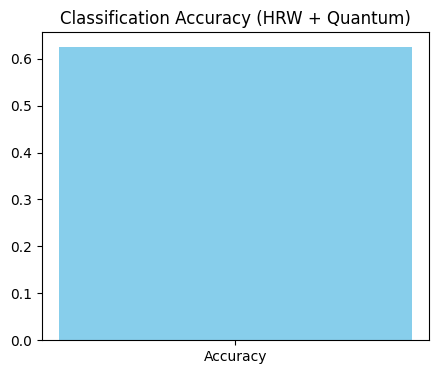

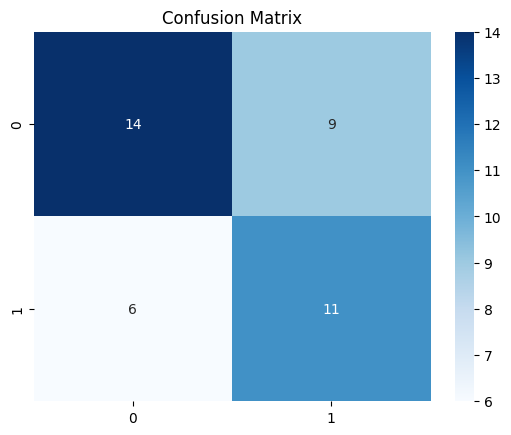

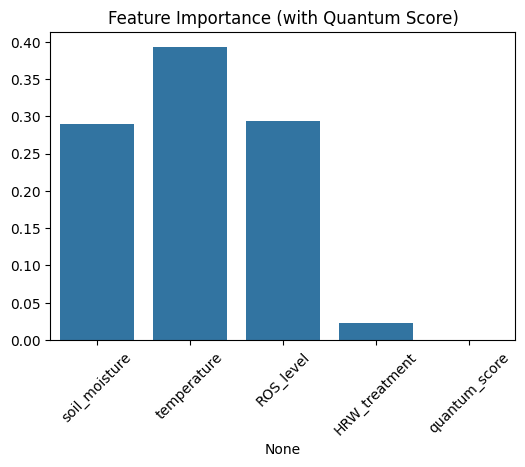

In [32]:
# 🌱 Quantum + Agriculture: HRW Integrated Pipeline
# Quantum layer: Classical simulation (NumPyMinimumEigensolver)
# HRW + crop data: RandomForest ML

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score

# -------------------------------
# 1️⃣ Quantum Layer (Reaction ΔE)
# -------------------------------
from qiskit.quantum_info import SparsePauliOp
from qiskit_algorithms import NumPyMinimumEigensolver

# Example Hamiltonians (H2 + H2O2 -> 2 H2O)
H2    = SparsePauliOp.from_list([("II", -1.05), ("XX", 0.18)])
H2O2  = SparsePauliOp.from_list([("II", -0.9), ("XX", 0.1)])
H2O   = SparsePauliOp.from_list([("II", -1.0), ("XX", 0.05)])

# Classical solver
solver = NumPyMinimumEigensolver()

E_H2   = solver.compute_minimum_eigenvalue(H2).eigenvalue.real
E_H2O2 = solver.compute_minimum_eigenvalue(H2O2).eigenvalue.real
E_H2O  = solver.compute_minimum_eigenvalue(H2O).eigenvalue.real

# Reaction energy
delta_E = 2*E_H2O - (E_H2 + E_H2O2)
print("ΔE (reaction energy) =", delta_E)

# -------------------------------
# 2️⃣ HRW Crop Data Layer
# -------------------------------
# Example synthetic real dataset (replace with your CSV if available)
data = pd.DataFrame({
    "soil_moisture": np.random.uniform(10, 40, 200),
    "temperature": np.random.uniform(20, 35, 200),
    "ROS_level": np.random.uniform(0.2, 1.0, 200),
    "HRW_treatment": np.random.choice([0, 1], 200),
    "yield_percent": np.random.uniform(50, 100, 200)
})

# Create target: stress resistance
data["stress_resistant"] = (data["yield_percent"] > 75).astype(int)

# Add quantum feature
data["quantum_score"] = delta_E

# -------------------------------
# 3️⃣ ML Pipeline
# -------------------------------
X = data[["soil_moisture", "temperature", "ROS_level", "HRW_treatment", "quantum_score"]]
y_class = data["stress_resistant"]
y_reg = data["yield_percent"]

# Split data
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_class, test_size=0.2, random_state=42)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y_reg, test_size=0.2, random_state=42)

# Classification
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_c, y_train_c)
y_pred_c = clf.predict(X_test_c)
acc = accuracy_score(y_test_c, y_pred_c)

# Regression
reg = RandomForestRegressor(random_state=42)
reg.fit(X_train_r, y_train_r)
y_pred_r = reg.predict(X_test_r)
mse = mean_squared_error(y_test_r, y_pred_r)
r2 = r2_score(y_test_r, y_pred_r)

# -------------------------------
# 4️⃣ Results & Visualization
# -------------------------------
print("\n🔹 ML Results with Quantum + HRW features")
print(f"Classification Accuracy: {acc:.2f}")
print("\nClassification Report:\n", classification_report(y_test_c, y_pred_c))
print(f"Regression MSE: {mse:.2f}")
print(f"Regression R²: {r2:.2f}")

# Accuracy bar
plt.figure(figsize=(5,4))
plt.bar(["Accuracy"], [acc], color='skyblue')
plt.title("Classification Accuracy (HRW + Quantum)")
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test_c, y_pred_c)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Feature Importance
importances = clf.feature_importances_
plt.figure(figsize=(6,4))
sns.barplot(x=X.columns, y=importances)
plt.title("Feature Importance (with Quantum Score)")
plt.xticks(rotation=45)
plt.show()


In [18]:
# 🌱 Quantum + Agriculture HRW Project
# Integrated Pipeline: Quantum Chemistry (Qiskit) + HRW Crop Data (ML)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score
import seaborn as sns

# -------------------------------
# 1️⃣ Quantum Layer (Qiskit VQE)
# -------------------------------
from qiskit.quantum_info import SparsePauliOp
from qiskit_aer.primitives import EstimatorV2 as AerEstimator
estimator = AerEstimator()
#from qiskit_ibm_runtime import EstimatorV2 as Estimator
#from qiskit.primitives import Estimator
from qiskit.circuit.library import TwoLocal

# Define Hamiltonian for demo (H2 + H2O2 -> 2H2O as proxy reaction)
#H2_H2O2 = SparsePauliOp.from_list([("II", -1.05), ("ZZ", 0.39), ("XX", 0.18)])
H2O = SparsePauliOp.from_list([("I", -1.00), ("Z", 0.40)])

# Ansatz
#ansatz = TwoLocal(num_qubits=2, reps=1, rotation_blocks=["ry", "rz"], entanglement="cz")

#estimator = Estimator()
# Define your ansatz and Hamiltonian
ansatz = TwoLocal(num_qubits=2, reps=2, rotation_blocks="ry", entanglement_blocks="cz")
H2_H2O2 = SparsePauliOp.from_list([("II", -1.05), ("XX", 0.18)])  # example

# EstimatorV2.run expects a list of tuples: [(circuit, operator)]
job = estimator.run([(ansatz, H2_H2O2)])
result = job.result()

print("Estimated energy:", result.values[0])
# Run estimation
#job1 = estimator.run(ansatz, H2_H2O2)
job2 = estimator.run(ansatz, H2O)

E_reactants = job1.result().values[0]
E_products = job2.result().values[0]

delta_E = E_products - E_reactants

# Save quantum result
qdf = pd.DataFrame([{
    "E_reactants": E_reactants,
    "E_products": E_products,
    "delta_E": delta_E,
    "quantum_score_vqe": -delta_E  # stability gain
}])

print("\n🔹 Quantum Simulation Results:")
print(qdf)

# -------------------------------
# 2️⃣ HRW Crop Data Layer (ML)
# -------------------------------
# Example dataset (replace with real HRW data if available)
data = pd.DataFrame({
    "soil_moisture": np.random.uniform(10, 40, 200),
    "temperature": np.random.uniform(20, 35, 200),
    "ROS_level": np.random.uniform(0.2, 1.0, 200),
    "HRW_treatment": np.random.choice([0, 1], 200),
    "yield_percent": np.random.uniform(50, 100, 200)
})

# Add synthetic target (stress resistance class)
data["stress_resistant"] = (data["yield_percent"] > 75).astype(int)

# Merge quantum result into dataset
data["quantum_score"] = qdf["quantum_score_vqe"].iloc[0]

# -------------------------------
# 3️⃣ ML Pipeline
# -------------------------------
X = data[["soil_moisture", "temperature", "ROS_level", "HRW_treatment", "quantum_score"]]
y_class = data["stress_resistant"]
y_reg = data["yield_percent"]

# Split data
X_train, X_test, y_train_c, y_test_c = train_test_split(X, y_class, test_size=0.2, random_state=42)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y_reg, test_size=0.2, random_state=42)

# Classification
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train_c)
y_pred_c = clf.predict(X_test)
acc = accuracy_score(y_test_c, y_pred_c)

# Regression
reg = RandomForestRegressor(random_state=42)
reg.fit(X_train_r, y_train_r)
y_pred_r = reg.predict(X_test_r)
mse = mean_squared_error(y_test_r, y_pred_r)
r2 = r2_score(y_test_r, y_pred_r)

# -------------------------------
# 4️⃣ Results & Visualization
# -------------------------------
print("\n🔹 ML Results with Quantum + HRW features")
print(f"Classification Accuracy: {acc:.2f}")
print("\nClassification Report:")
print(classification_report(y_test_c, y_pred_c))

print(f"\nRegression MSE: {mse:.2f}")
print(f"Regression R²: {r2:.2f}")

# Plot Accuracy
plt.figure(figsize=(5,4))
plt.bar(["Accuracy"], [acc])
plt.title("Classification Accuracy (HRW + Quantum)")
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test_c, y_pred_c)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Feature Importance
importances = clf.feature_importances_
plt.figure(figsize=(6,4))
sns.barplot(x=X.columns, y=importances)
plt.title("Feature Importance (with Quantum Score)")
plt.xticks(rotation=45)
plt.show()


ValueError: The number of values (0) does not match the number of parameters (6) for the circuit.

In [30]:
# 🌱 Quantum + Agriculture HRW Project
# Integrated Pipeline: Quantum Chemistry (Qiskit) + HRW Crop Data (ML)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score

# -------------------------------
# 1️⃣ Quantum Layer (Qiskit VQE)
# -------------------------------
from qiskit.quantum_info import SparsePauliOp
from qiskit_aer.primitives import EstimatorV2 as AerEstimator
from qiskit.circuit.library import TwoLocal

# --- Define Hamiltonians (demo placeholders)
H2_H2O2 = SparsePauliOp.from_list([("II", -1.05), ("XX", 0.18)])
H2O     = SparsePauliOp.from_list([("II", -1.0), ("ZZ", 0.4)])

# --- Ansatz
ansatz = TwoLocal(num_qubits=2, reps=2, rotation_blocks="ry", entanglement_blocks="cz")

# --- Decompose TwoLocal for AerEstimator
ansatz_decomposed = ansatz.decompose()
param_values = np.zeros(ansatz.num_parameters)

# --- Estimator setup
estimator = AerEstimator()

# --- Prepare jobs: list of tuples (circuit, observable, parameter_values)
jobs = [
    (ansatz_decomposed, H2_H2O2, param_values),
    (ansatz_decomposed, H2O, param_values)
]

# --- Run Estimator
job = estimator.run(jobs)
results = job.result()

#E_reactants = results.values[0]
#E_products  = results.values[1]

# Extract expectation values
E_reactants = results.data[0].values[0]  # first observable of first circuit
E_products  = results.data[1].values[0]  # first observable of second circuit


delta_E = E_products - E_reactants

print("\n🔹 Quantum Layer Results:")
print(f"E_reactants: {E_reactants}")
print(f"E_products : {E_products}")
print(f"ΔE         : {delta_E}")

# Normalize quantum score (for ML integration)
quantum_score = -delta_E

# -------------------------------
# 2️⃣ HRW Crop Data Layer (ML)
# -------------------------------
# Example dataset (replace with real HRW crop data)
data = pd.DataFrame({
    "soil_moisture": np.random.uniform(10, 40, 200),
    "temperature"  : np.random.uniform(20, 35, 200),
    "ROS_level"    : np.random.uniform(0.2, 1.0, 200),
    "HRW_treatment": np.random.choice([0, 1], 200),
    "yield_percent": np.random.uniform(50, 100, 200)
})

# Synthetic target: stress resistance class
data["stress_resistant"] = (data["yield_percent"] > 75).astype(int)

# Merge quantum result as a new feature
data["quantum_score"] = quantum_score

# -------------------------------
# 3️⃣ ML Pipeline
# -------------------------------
features = ["soil_moisture", "temperature", "ROS_level", "HRW_treatment", "quantum_score"]
X = data[features]
y_class = data["stress_resistant"]
y_reg   = data["yield_percent"]

# Train-test split
X_train, X_test, y_train_c, y_test_c = train_test_split(X, y_class, test_size=0.2, random_state=42)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y_reg, test_size=0.2, random_state=42)

# --- Classification
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train_c)
y_pred_c = clf.predict(X_test)
acc = accuracy_score(y_test_c, y_pred_c)

# --- Regression
reg = RandomForestRegressor(random_state=42)
reg.fit(X_train_r, y_train_r)
y_pred_r = reg.predict(X_test_r)
mse = mean_squared_error(y_test_r, y_pred_r)
r2  = r2_score(y_test_r, y_pred_r)

# -------------------------------
# 4️⃣ Results & Visualization
# -------------------------------
print("\n🔹 ML Results with Quantum + HRW features")
print(f"Classification Accuracy: {acc:.2f}")
print("\nClassification Report:\n", classification_report(y_test_c, y_pred_c))
print(f"\nRegression MSE: {mse:.2f}")
print(f"Regression R²: {r2:.2f}")

# Classification Accuracy Plot
plt.figure(figsize=(5,4))
plt.bar(["Accuracy"], [acc], color="skyblue")
plt.title("Classification Accuracy (HRW + Quantum)")
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test_c, y_pred_c)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Feature Importance
importances = clf.feature_importances_
plt.figure(figsize=(6,4))
sns.barplot(x=features, y=importances)
plt.title("Feature Importance (with Quantum Score)")
plt.xticks(rotation=45)
plt.show()


AttributeError: 'PrimitiveResult' object has no attribute 'data'

In [ ]:
# === Generalized Quantum Chemistry Reaction Analyzer ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit_nature.second_q.algorithms import GroundStateEigensolver
from qiskit_nature.second_q.hamiltonians import ElectronicStructureProblem

from qiskit.circuit.library import TwoLocal
from qiskit.algorithms.minimum_eigensolvers import VQE, NumPyMinimumEigensolver
from qiskit.algorithms.optimizers import SLSQP
from qiskit.primitives import Estimator


# === 1. Helper: Compute energy (Exact + VQE) ===
def compute_energies(molecule: str, basis="sto3g"):
    """Compute exact (FCI) and VQE ground state energy for a molecule"""

    # Build electronic structure problem
    driver = PySCFDriver(atom=molecule, basis=basis)
    problem = driver.run()
    mapper = JordanWignerMapper()

    # Reference energy (exact / FCI)
    exact_solver = NumPyMinimumEigensolver()
    gsc_exact = GroundStateEigensolver(mapper, exact_solver)
    exact_result = gsc_exact.solve(problem)
    exact_energy = exact_result.total_energies[0].real

    # Ansatz for VQE (can replace with UCCSD too)
    ansatz = TwoLocal(rotation_blocks="ry", entanglement_blocks="cz", reps=2)
    optimizer = SLSQP(maxiter=200)
    vqe_solver = VQE(ansatz=ansatz, optimizer=optimizer, estimator=Estimator())
    gsc_vqe = GroundStateEigensolver(mapper, vqe_solver)
    vqe_result = gsc_vqe.solve(problem)
    vqe_energy = vqe_result.total_energies[0].real

    return exact_energy, vqe_energy


# === 2. Reaction Analyzer ===
def analyze_reaction(reactants, products):
    """Compute ΔE for reaction reactants -> products"""
    ref_energies = {}

    # Compute molecular energies
    for mol in reactants + products:
        if mol not in ref_energies:
            exact, vqe = compute_energies(mol)
            ref_energies[mol] = (exact, vqe)

    # Reaction energy
    exact_react = sum(ref_energies[m][0] for m in products) - sum(ref_energies[m][0] for m in reactants)
    vqe_react   = sum(ref_energies[m][1] for m in products) - sum(ref_energies[m][1] for m in reactants)

    # Convert Hartree → eV
    HARTREE_TO_EV = 27.2114
    return exact_react*HARTREE_TO_EV, vqe_react*HARTREE_TO_EV, ref_energies


# === 3. Run Example: H2 + H2O2 → 2 H2O ===
reaction = {
    "reactants": ["H 0 0 0; H 0 0 0.74", "O 0 0 0; O 0 0 1.21; H 0.76 0.58 0; H -0.76 0.58 0"],  # H2, H2O2
    "products":  ["O 0 0 0; H 0.76 0.58 0; H -0.76 0.58 0", "O 0 0 0; H 0.76 0.58 0; H -0.76 0.58 0"]  # 2 H2O
}

deltaE_exact, deltaE_vqe, energies = analyze_reaction(reaction["reactants"], reaction["products"])

print("\nMolecular energies (Hartree):")
for mol, (e_exact, e_vqe) in energies.items():
    print(f"{mol:25s}  Exact: {e_exact:.6f}  VQE: {e_vqe:.6f}")

print("\nReaction:", "H2 + H2O2 → 2 H2O")
print(f"ΔE exact: {deltaE_exact:.3f} eV")
print(f"ΔE VQE  : {deltaE_vqe:.3f} eV")

# === 4. Save results ===
df = pd.DataFrame([{
    "reaction": "H2 + H2O2 -> 2 H2O",
    "deltaE_exact_eV": deltaE_exact,
    "deltaE_vqe_eV": deltaE_vqe
}])
df.to_csv("quantum_reaction_results.csv", index=False)
print("\nSaved results to quantum_reaction_results.csv ✅")


In [12]:
pip install pyscf


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.2/51.2 MB 10.8 MB/s eta 0:00:00


In [ ]:
"""
Reaction ΔE analyzer — modern Qiskit / Qiskit-Nature compatible

Purpose:
 - Build PySCF electronic-structure problems from simple geometry strings
 - Compute exact energies (NumPy diagonalization)
 - Run VQE (Estimator-based) to get approximate energies
 - Compute reaction ΔE (exact & VQE), convert to eV, normalize to a score
 - Save results to quantum_scores.csv

Notes:
 - If imports fail, run the suggested pip install command printed by the script.
"""

import sys
import math
import traceback
import numpy as np
import pandas as pd

# ----- Robust imports (modern API preferred; helpful fallback provided) -----
try:
    # Qiskit core & Aer
    from qiskit_aer import Aer
except Exception:
    Aer = None

# algorithm_globals moved around in some versions
try:
    from qiskit_algorithms.utils import algorithm_globals
except Exception:
    try:
        from qiskit.utils import algorithm_globals
    except Exception:
        algorithm_globals = None

# Primitives (Estimator)
try:
    from qiskit.primitives import Estimator
except Exception:
    Estimator = None

# VQE + classical eigensolver (modern package layout)
try:
    from qiskit_algorithms.minimum_eigensolvers import VQE, NumPyMinimumEigensolver
    from qiskit_algorithms.optimizers import SLSQP, COBYLA
except Exception:
    # fallback to qiskit.algorithms paths (older)
    try:
        from qiskit_algorithms import VQE, NumPyMinimumEigensolver
        from qiskit_algorithms.optimizers import SLSQP, COBYLA
    except Exception:
        VQE = NumPyMinimumEigensolver = SLSQP = COBYLA = None

# Qiskit Nature (second_q drivers / mappers)
_have_qiskit_nature = True
try:
    from qiskit_nature.second_q.drivers import PySCFDriver
    # newer names:
    try:
        from qiskit_nature.second_q.mappers import JordanWignerMapper
    except Exception:
        from qiskit_nature.mappers.second_quantization import JordanWignerMapper
    # Problem API (sometimes lives here or under problems)
    try:
        from qiskit_nature.second_q.problems import ElectronicStructureProblem
    except Exception:
        ElectronicStructureProblem = None
except Exception:
    _have_qiskit_nature = False

# Circuit ansatz
try:
    from qiskit.circuit.library import TwoLocal, UCCSD
    from qiskit.circuit import QuantumCircuit
except Exception:
    TwoLocal = UCCSD = QuantumCircuit = None

# utilities for warnings
import warnings
warnings.filterwarnings("ignore")

# --- Helper utilities ---------------------------------------------------------
HARTREE_TO_EV = 27.211386245988

def pip_fix_hint():
    """Return a pip command hint to align versions (printed when imports fail)."""
    return (
        "\nSuggested fix (upgrade to compatible latest packages):\n\n"
        "  pip install -U qiskit qiskit-aer qiskit-algorithms qiskit-nature pyscf\n\n"
        "If you'd rather use older APIs, try (not recommended unless needed):\n\n"
        "  pip install qiskit==0.43.2 qiskit-nature==0.5.2\n"
    )

# --- Core: build ElectronicStructureProblem (PySCF) ---------------------------
def build_problem_from_geom(geom_string, charge=0, multiplicity=1, basis="sto3g"):
    """
    geom_string: PySCF-style like "H 0 0 0; H 0 0 0.74" or list of tuples accepted by user earlier.
    Returns: object 'problem' (if qiskit_nature available) or raises informative error.
    """
    if not _have_qiskit_nature:
        raise ImportError("qiskit-nature not available in this environment." + pip_fix_hint())

    # PySCFDriver accepts 'atom' as a string or list; multiplicity handling differs by versions
    # We'll attempt to call driver with common argument sets.
    try:
        driver = PySCFDriver(atom=geom_string, basis=basis, charge=charge, multiplicity=multiplicity)
    except TypeError:
        # older/newer kw changes: try alternate names (spin vs multiplicity)
        try:
            driver = PySCFDriver(atom=geom_string, basis=basis, charge=charge, spin=multiplicity-1)
        except Exception as e:
            raise RuntimeError("Failed to construct PySCFDriver: " + str(e))
    problem = driver.run()
    return problem

# --- Convert problem -> qubit operator (safe fallback) ------------------------
def problem_to_qubit_op(problem):
    """
    Returns (qubit_op, num_qubits) where qubit_op is a qiskit-appropriate operator
    that NumPyMinimumEigensolver / VQE can accept.
    """
    # Extract electronic energy operator from problem in a robust way
    try:
        sec_ops = problem.second_q_ops()
        # key 0 assumed to be ElectronicEnergy in common releases
        main_op = sec_ops[0]
    except Exception:
        # try alternative access
        try:
            main_op = problem.second_q_ops().get("ElectronicEnergy", None)
            if main_op is None:
                raise RuntimeError("Couldn't find ElectronicEnergy operator inside problem.second_q_ops()")
        except Exception as e:
            raise RuntimeError("Failed to extract second_q_ops from problem: " + str(e))

    # Map to qubit operator using Jordan-Wigner
    try:
        mapper = JordanWignerMapper()
    except Exception as e:
        raise RuntimeError("JordanWignerMapper import failed: " + str(e))

    try:
        qubit_op = mapper.map(main_op)
    except Exception:
        # older API: some versions use qubit_converter.convert(...)
        try:
            from qiskit_nature.second_q.converters import QubitConverter
            qubit_converter = QubitConverter(mapper)
            qubit_op = qubit_converter.convert(main_op, num_particles=problem.num_particles)
        except Exception as e:
            raise RuntimeError("Mapping to qubit operator failed: " + str(e))

    # num qubits (try a few attributes)
    num_qubits = getattr(qubit_op, "num_qubits", None)
    if num_qubits is None:
        # try attribute from operator descriptors
        try:
            num_qubits = qubit_op.num_qubits
        except Exception:
            num_qubits = None
    return qubit_op, num_qubits

# --- Exact (classical) energy computation ------------------------------------
def compute_exact_energy(qubit_op):
    """Compute exact (dense) eigenvalue using NumPyMinimumEigensolver"""
    if NumPyMinimumEigensolver is None:
        raise ImportError("NumPyMinimumEigensolver is not available." + pip_fix_hint())

    exact_solver = NumPyMinimumEigensolver()
    exact_result = exact_solver.compute_minimum_eigenvalue(qubit_op)
    return float(exact_result.eigenvalue.real)

# --- VQE runner (Estimator-based if available, fallback to statevector) ------
def run_vqe_on_qubit_op(qubit_op, num_qubits=None, optimizer=None, maxiter=200, seed=42):
    """
    Run VQE on a given qubit_op.
    - Uses Estimator primitive if available (recommended).
    - Falls back to Aer statevector + QuantumInstance if Estimator is absent.
    Returns VQE energy (float).
    """
    if VQE is None:
        raise ImportError("VQE/minimum_eigensolver not available." + pip_fix_hint())

    if optimizer is None:
        optimizer = SLSQP(maxiter=maxiter) if SLSQP is not None else COBYLA(maxiter=maxiter)

    # Build ansatz
    if TwoLocal is None:
        raise ImportError("TwoLocal ansatz not available in qiskit.circuit.library." + pip_fix_hint())
    if num_qubits is None:
        # attempt to infer (some operator types expose .num_qubits)
        try:
            num_qubits = int(qubit_op.num_qubits)
        except Exception:
            raise RuntimeError("Unable to determine number of qubits for the ansatz.")

    ansatz = TwoLocal(num_qubits=num_qubits, rotation_blocks="ry", entanglement_blocks="cz", reps=2)
    # Modern path: supply estimator primitive
    if Estimator is not None:
        estimator = Estimator()
        vqe_solver = VQE(ansatz=ansatz, optimizer=optimizer, estimator=estimator)
        res = vqe_solver.compute_minimum_eigenvalue(operator=qubit_op)
        return float(res.eigenvalue.real)
    else:
        # Fallback: use Aer statevector simulator through older VQE signature (quantum_instance)
        if Aer is None:
            raise ImportError("Neither Estimator nor Aer available; can't run VQE.")
        # Try to create QuantumInstance if available (different qiskit versions)
        try:
            from qiskit.utils import QuantumInstance
            qi = QuantumInstance(Aer.get_backend("statevector_simulator"), seed_simulator=seed, seed_transpiler=seed)
            vqe_solver = VQE(ansatz=ansatz, optimizer=optimizer, quantum_instance=qi)
            res = vqe_solver.compute_minimum_eigenvalue(operator=qubit_op)
            return float(res.eigenvalue.real)
        except Exception:
            raise RuntimeError("Estimator not present and QuantumInstance/VQE fallback failed.")


# === High-level function: compute energies for a geometry --------------------
def compute_exact_and_vqe(geom_string, basis="sto3g", charge=0, multiplicity=1, maxiter=200):
    """
    geom_string: e.g. "H 0 0 -0.37; H 0 0 0.37"
    Returns: (exact_energy_hartree, vqe_energy_hartree)
    """
    problem = build_problem_from_geom(geom_string, charge=charge, multiplicity=multiplicity, basis=basis)
    qubit_op, nq = problem_to_qubit_op(problem)
    exact = compute_exact_energy(qubit_op)
    vqe = run_vqe_on_qubit_op(qubit_op, num_qubits=nq, maxiter=maxiter)
    return exact, vqe

# === Reaction analyzer -------------------------------------------------------
def analyze_reaction(reactant_geom_list, product_geom_list, basis="sto3g"):
    """
    reactant_geom_list, product_geom_list: lists of geometry strings (one per molecule).
    If coefficients are needed (e.g. 2 H2O), pass the same geometry twice in list.
    Returns: dataframe with reaction ΔE exact/eV and VQE/eV and quantum_scores.
    """
    # compute energies for all unique geometries
    unique_geoms = {}
    for g in (reactant_geom_list + product_geom_list):
        if g not in unique_geoms:
            print(f"Computing energies for:\n {g}")
            exact, vqe = compute_exact_and_vqe(g, basis=basis)
            unique_geoms[g] = {"exact": exact, "vqe": vqe}

    # total energies
    exact_react = sum(unique_geoms[g]["exact"] for g in product_geom_list) - sum(unique_geoms[g]["exact"] for g in reactant_geom_list)
    vqe_react   = sum(unique_geoms[g]["vqe"]   for g in product_geom_list) - sum(unique_geoms[g]["vqe"]   for g in reactant_geom_list)

    dE_exact_eV = exact_react * HARTREE_TO_EV
    dE_vqe_eV   = vqe_react * HARTREE_TO_EV

    def map_to_score(dE_eV, scale=1.0):
        x = -dE_eV / scale
        return 1.0 / (1.0 + math.exp(-x))

    df = pd.DataFrame([{
        "reaction": " + ".join(reactant_geom_list) + " -> " + " + ".join(product_geom_list),
        "deltaE_exact_eV": dE_exact_eV,
        "deltaE_vqe_eV": dE_vqe_eV,
        "quantum_score_exact": map_to_score(dE_exact_eV),
        "quantum_score_vqe": map_to_score(dE_vqe_eV)
    }])

    # attach per-molecule energies for traceability
    for g, vals in unique_geoms.items():
        df[f"exact_{g}"] = vals["exact"]
        df[f"vqe_{g}"] = vals["vqe"]

    return df, unique_geoms

# === Example usage: H2 + H2O2 -> 2 H2O ---------------------------------------
if __name__ == "__main__":
    # Example geometries (you can replace with your own)
    H2_geom   = "H 0 0 -0.37; H 0 0 0.37"
    H2O_geom  = "O 0 0 0; H 0.7586 0 0.5043; H -0.7586 0 0.5043"
    H2O2_geom = "O 0 0 0; O 1.46 0 0; H -0.5 0.9 0; H 1.96 -0.9 0"

    # reactants: H2 + H2O2
    reactants = [H2_geom, H2O2_geom]
    # products: 2 * H2O (pass twice to represent stoichiometry)
    products  = [H2O_geom, H2O_geom]

    try:
        df, per_mol = analyze_reaction(reactants, products, basis="sto3g")
        print("\n--- Reaction results ---")
        print(df.T)
        csv_path = "quantum_scores.csv"
        df.to_csv(csv_path, index=False)
        print(f"\nSaved results to {csv_path}")
    except Exception as e:
        print("ERROR during analysis:")
        traceback.print_exc()
        print("\nIf this is an import/version error, try upgrading packages with:")
        print(pip_fix_hint())
        sys.exit(1)
